## Preprocessing

In [1]:
# TODO: comment
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
# TODO: comment
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
# TODO: comment
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
# TODO: comment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
# TODO: comment
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
# TODO: comment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

In [7]:
# TODO: stats

In [8]:
# TODO: plot

## Newer Solution for testing NN-Configuration

In [9]:
# Imports for class
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt    
import itertools
        

""" 
    The following class helps in streamlining the building, training, and testing of a Neural Network (NN)
    With it, we can see the effect on the result for changing a single parameter 
    So we only have to provide the name of the parameter we have to change, and the values we want to test it with
"""
class NeuralNetworkParameterTester:

    # The config holds all the changeable parameters for building, training and testing the NN
    parameter_config = {
                'number_of_hidden_layers': [1],
                'number_of_units_per_hidden_layer': [10],
                'epochs': [100],
                'batch_size': [64],
                'activation_function': ['relu'],
                'loss_function': ['categorical_crossentropy'],
                'optimizer': ['sgd']}
    
    # Result of the test
    result = []
    
    """ 
        If you want to test your parameters, then you have to call this class
    """       
    def run(self):
        
        # Reset result
        self.result = []
        
        # Build all possible parameter combinations and  ...
        for config in self.__get_all_config_combinations():
            # ... build the NN-model for it
            model = self.__build(config)
            # ... train the NN-model 
            trained_model, history = self.__train(config, model)
            # ... test the NN-model and get the accuracy score
            accuracy = self.__test(trained_model)

            # Save the result
            self.result.append({'parameter_config': config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})
            
    """ 
        The following method builds all combinations of your parameter-config
    """          
    def __get_all_config_combinations(self):

        raw_combinations = list(itertools.product(*(self.parameter_config[parameter] for parameter in self.parameter_config)))

        config_combinations_list = []
        for combination in raw_combinations:
            c = {
                'number_of_hidden_layers': combination[0],
                'number_of_units_per_hidden_layer': combination[1],
                'epochs': combination[2],
                'batch_size': combination[3],
                'activation_function': combination[4],
                'loss_function': combination[5],
                'optimizer': combination[6]}
            
            config_combinations_list.append(c)
        
        return config_combinations_list
    
    """ 
        The following method builds the NN-Model
    """   
    def __build(self, config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Building of input layer
        model.add(Dense(config['number_of_units_per_hidden_layer'], 
                        input_dim=48, 
                        activation=config['activation_function']))
        # Building of hidden layer(s)
        for i in range(config['number_of_hidden_layers']):
            model.add(Dense(config['number_of_units_per_hidden_layer'], 
                            activation=config['activation_function']))
        # Building of output layer
        model.add(Dense(11, activation="softmax"))
        # ?
        model.compile(loss=config['loss_function'], 
                      optimizer=config['optimizer'], 
                      metrics=['accuracy'])
        return model
    
    """ 
        The following method trains the NN-Model
    """   
    def __train(self, config, model):
        # xtrain and ytrain is the data from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=config['epochs'], 
                            batch_size=config['batch_size'])  
        
        return model, history
    
    """ 
        The following method tests the NN-Model
    """ 
    # TODO: look at this method more closely. So far just copy paste
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        # TODO: calculate confusion matrix and put it in result
        return accuracy
                                    
                                    
    #--------------- Setter methods for setting parameters --------------------------------------#
    
    def set_number_of_hidden_layers(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_hidden_layers"] = val
        else:
            self.parameter_config["number_of_hidden_layers"] = [val]
        
    def set_number_of_units_per_hidden_layer(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_units_per_hidden_layer"] = val
        else:
            self.parameter_config["number_of_units_per_hidden_layer"] = [val]
        
    def set_activation_function(self, val):
        if isinstance(val, list):
            self.parameter_config["activation_function"] = val
        else:
            self.parameter_config["activation_function"] = [val]
        
    def set_epochs(self, val):
        if isinstance(val, list):
            self.parameter_config["epochs"] = val
        else:
            self.parameter_config["epochs"] = [val]
        
    def set_batch_size(self, val):
        if isinstance(val, list):
            self.parameter_config["batch_size"] = val
        else:
            self.parameter_config["batch_size"] = [val]
        
    def set_loss_function(self, val):
        if isinstance(val, list):
            self.parameter_config["loss_function"] = val
        else:
            self.parameter_config["loss_function"] = [val]
        
    def set_optimizer(self, val):
        if isinstance(val, list):
            self.parameter_config["optimizer"] = val
        else:
            self.parameter_config["optimizer"] = [val]
        
    #--------------- Resets the config to default values --------------------------------------#
    
    def reset_config(self):
        parameter_config = {
            'number_of_hidden_layers': [1],
            'number_of_units_per_hidden_layer': [10],
            'epochs': [100],
            'batch_size': [64],
            'activation_function': ['relu'],
            'loss_function': ['categorical_crossentropy'],
            'optimizer': ['sgd']}
        
        self.parameter_config = parameter_config
        
        
    #--------------- Helper methods -----------------------------------------------------------#
        
    def __get_number_of_params_with_multiple_vals(self):
        number_of_params_with_multiple_vals = 0 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                number_of_params_with_multiple_vals += 1
        return number_of_params_with_multiple_vals
    
    def __get_param_names_with_multiple_vals(self):
        param_names_with_multiple_vals = [] 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                param_names_with_multiple_vals.append(key)
        return param_names_with_multiple_vals
        
        
    #--------------- Plotter methods -----------------------------------------------------------#
    
    def plot_result(self):
        
        number_of_params_with_multiple_vals = self.__get_number_of_params_with_multiple_vals()
        param_names_with_multiple_vals = self.__get_param_names_with_multiple_vals()
        
        if number_of_params_with_multiple_vals == 1:
            self.__plot_2d(param_names_with_multiple_vals[0])
        elif number_of_params_with_multiple_vals == 2:
            self.__plot_3d(param_names_with_multiple_vals)
        else:
            print("Plotting for this result is not supported")
            # TODO PCA?
        
    def __plot_2d(self, param_name_with_multiple_vals):

        param_vals = [element['parameter_config'][param_name_with_multiple_vals] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(param_vals, accuracy_result)
        plt.plot(param_vals, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + param_name_with_multiple_vals + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(param_name_with_multiple_vals)
        plt.show()
        
        print("\n\n")
        
        df = pd.DataFrame(list(zip(param_vals, accuracy_result)), 
               columns =[param_name_with_multiple_vals, 'Accuracy']) 
        print(df)
        
        
    # TODO sis  
    def __plot_3d(self, param_name_with_multiple_vals):

        pass

Using TensorFlow backend.


## Test NN with parameters

In [10]:
nnpt = NeuralNetworkParameterTester()

In [11]:
nnpt.set_number_of_hidden_layers(2)
nnpt.set_number_of_units_per_hidden_layer([2, 5, 6])

In [12]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [2, 5, 6],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [12]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [2, 5, 6],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [13]:
nnpt.run()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





26329/26329 [==============================] - 1s 27us/step - loss: 2.3979 - acc: 0.0897
Epoch 2/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0941
Epoch 3/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0914
Epoch 4/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0924
Epoch 5/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0905
Epoch 6/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0937
Epoch 7/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3979 - acc: 0.0978
Epoch 8/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.3978 - acc: 0.0979
Epoch 9/100
26329/26329 [==============================] - 0s 14us/step - loss: 2.397

26329/26329 [==============================] - 0s 14us/step - loss: 1.3184 - acc: 0.4124
Epoch 54/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.3140 - acc: 0.4167
Epoch 55/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.3006 - acc: 0.4124
Epoch 56/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2956 - acc: 0.4155
Epoch 57/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2824 - acc: 0.4183
Epoch 58/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2807 - acc: 0.4172
Epoch 59/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2729 - acc: 0.4160
Epoch 60/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2664 - acc: 0.4186
Epoch 61/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2584 - acc: 0.4209
Epoch 62/100
26329/26329 [==============================] - 0s 14us/step - loss: 1.2549 - acc: 

26329/26329 [==============================] - 0s 14us/step - loss: 0.8109 - acc: 0.6698
Epoch 34/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.8034 - acc: 0.6722
Epoch 35/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7973 - acc: 0.6731
Epoch 36/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7916 - acc: 0.6748
Epoch 37/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7863 - acc: 0.6775
Epoch 38/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7809 - acc: 0.6818
Epoch 39/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7758 - acc: 0.6828
Epoch 40/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7707 - acc: 0.6851
Epoch 41/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7660 - acc: 0.6871
Epoch 42/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7609 - acc: 

26329/26329 [==============================] - 0s 15us/step - loss: 0.7756 - acc: 0.6598
Epoch 14/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.7516 - acc: 0.6751
Epoch 15/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.7224 - acc: 0.6923
Epoch 16/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.6905 - acc: 0.7083
Epoch 17/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.6647 - acc: 0.7206
Epoch 18/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.6416 - acc: 0.7350
Epoch 19/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.6119 - acc: 0.7556
Epoch 20/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.5809 - acc: 0.7731
Epoch 21/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.5422 - acc: 0.7870
Epoch 22/100
26329/26329 [==============================] - ETA: 0s - loss: 0.5043 - acc: 0.801

26329/26329 [==============================] - 0s 15us/step - loss: 0.1738 - acc: 0.9380
Epoch 94/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1724 - acc: 0.9406
Epoch 95/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.1714 - acc: 0.9393
Epoch 96/100
26329/26329 [==============================] - 0s 14us/step - loss: 0.1692 - acc: 0.9398
Epoch 97/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1696 - acc: 0.9403
Epoch 98/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1685 - acc: 0.9404
Epoch 99/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1661 - acc: 0.9412
Epoch 100/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1669 - acc: 0.9409


In [14]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 2,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x1ca93c54f08>,
   'accuracy': 0.39576213260423787}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 5,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x1ca9f28c7c8>,
   'accuracy': 0.7990430622009569}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 6,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequ

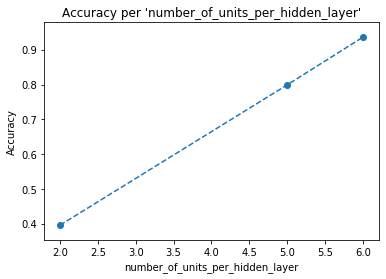

/n/n
   number_of_units_per_hidden_layer  Accuracy
0                                 2  0.395762
1                                 5  0.799043
2                                 6  0.936090


In [15]:
nnpt.plot_result()

In [16]:
nnpt.reset_config()
nnpt.set_number_of_hidden_layers([2, 4, 5])
nnpt.set_number_of_units_per_hidden_layer(6)

In [17]:
nnpt.parameter_config

{'number_of_hidden_layers': [2, 4, 5],
 'number_of_units_per_hidden_layer': [6],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [18]:
nnpt.run()

Epoch 1/100
26329/26329 [==============================] - 1s 30us/step - loss: 2.2847 - acc: 0.1296
Epoch 2/100
26329/26329 [==============================] - 0s 15us/step - loss: 1.9916 - acc: 0.2506
Epoch 3/100
26329/26329 [==============================] - 0s 15us/step - loss: 1.7199 - acc: 0.3017
Epoch 4/100
26329/26329 [==============================] - 0s 16us/step - loss: 1.4784 - acc: 0.3962
Epoch 5/100
26329/26329 [==============================] - 0s 15us/step - loss: 1.3041 - acc: 0.4881
Epoch 6/100
26329/26329 [==============================] - 0s 16us/step - loss: 1.1495 - acc: 0.5446
Epoch 7/100
26329/26329 [==============================] - 0s 16us/step - loss: 1.0138 - acc: 0.5732
Epoch 8/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.9104 - acc: 0.5941
Epoch 9/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.8399 - acc: 0.6175
Epoch 10/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.7913 - a

26329/26329 [==============================] - 0s 15us/step - loss: 0.1779 - acc: 0.9406
Epoch 82/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1752 - acc: 0.9399
Epoch 83/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1728 - acc: 0.9401
Epoch 84/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1738 - acc: 0.9407
Epoch 85/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1716 - acc: 0.9414
Epoch 86/100
26329/26329 [==============================] - 0s 16us/step - loss: 0.1720 - acc: 0.9408
Epoch 87/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1688 - acc: 0.9413
Epoch 88/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1693 - acc: 0.9415
Epoch 89/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1657 - acc: 0.9439
Epoch 90/100
26329/26329 [==============================] - 0s 15us/step - loss: 0.1651 - acc: 

26329/26329 [==============================] - 0s 17us/step - loss: 0.3189 - acc: 0.8911
Epoch 62/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.3110 - acc: 0.8950
Epoch 63/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.3065 - acc: 0.8976
Epoch 64/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.3019 - acc: 0.8998
Epoch 65/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2971 - acc: 0.9001
Epoch 66/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2967 - acc: 0.9037
Epoch 67/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.2918 - acc: 0.9039
Epoch 68/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2923 - acc: 0.9012
Epoch 69/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2828 - acc: 0.9077
Epoch 70/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2801 - acc: 

26329/26329 [==============================] - 1s 19us/step - loss: 0.2940 - acc: 0.8928
Epoch 42/100
26329/26329 [==============================] - 1s 19us/step - loss: 0.2617 - acc: 0.8973
Epoch 43/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2637 - acc: 0.8970
Epoch 44/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2462 - acc: 0.9028
Epoch 45/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2406 - acc: 0.9031
Epoch 46/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.2400 - acc: 0.9046
Epoch 47/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.2377 - acc: 0.9043
Epoch 48/100
26329/26329 [==============================] - 1s 20us/step - loss: 0.2486 - acc: 0.9044
Epoch 49/100
26329/26329 [==============================] - 1s 20us/step - loss: 0.2288 - acc: 0.9117
Epoch 50/100
26329/26329 [==============================] - 0s 19us/step - loss: 0.2210 - acc: 

In [19]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 6,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x1cab52a9408>,
   'accuracy': 0.8834586466165414}},
 {'parameter_config': {'number_of_hidden_layers': 4,
   'number_of_units_per_hidden_layer': 6,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x1cab5304588>,
   'accuracy': 0.9261790840738209}},
 {'parameter_config': {'number_of_hidden_layers': 5,
   'number_of_units_per_hidden_layer': 6,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Seque

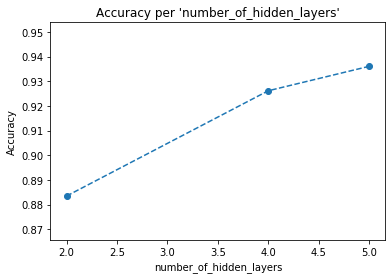

/n/n
   number_of_hidden_layers  Accuracy
0                        2  0.883459
1                        4  0.926179
2                        5  0.936090


In [20]:
nnpt.plot_result()

In [21]:
# TODO: Plot Matrix